# NLP Multi-classifier 

We would like to be able to classify text into their respective categories. It would be nice to perform these classification with no training at all, cause right now we don't have data for training. This is called zero-shot-classification. The model we'll be trying to use is the <em>Transformer</em>, that clearly overtake any other, at the moment, in NLP applications, especially with big texts. The results, in this tiny experiment, are outstanding, correctly classifying six pieces of text into their six categories. The Transformer used at this level is called BART, and came out on 2020. Differently than BERT, that has an Encoder structure, or GPT, that has a Decoder structure, BART is a complete Transformer, meaning it shows an Encoder-Decoder structure. In the second part of this notebook, we want to see if we can fine tune a model: we use a different model, cause it's still not completely clear if our zero-shot-classification model, that is called
<ul>
    <li>facebook/bart-large-mnli</li>
</ul>
is fine-tunable. So we will use a
<ul>
    <li>bert-base-uncased</li>
</ul>
model. This is a classic BERT and results, in this case, are not so outstanding, but we should see what happens with more and more, and reliable, data.<br>
There is still a lot to study, regarding this topic, and hopefully way more is about to come.

## 1. Zero-shot-classification

In [1]:
# upgrade transformers and datasets to latest versions
!pip install --upgrade transformers
!pip install --upgrade datasets

In [2]:
import transformers
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

print("Transformers version: ", transformers.__version__)

Transformers version:  4.18.0


In [3]:
classifier = pipeline("zero-shot-classification", model='facebook/bart-large-mnli')

In [4]:
candidate_labels = ["Spinnaker Canary Deployment", 
                    "Serverless Content Render", 
                    "Marketing Data Warehouse", 
                    "High Quality Machine Learning Solution",
                    "Multi-architecture Container Images for IoT Devices",
                    "Propensity Modeling For Gaming Applications"]

In [5]:
str_tmp_01 = "The architecture has the following components: A Spinnaker instance that implements canary \
deployments. A Google Kubernetes Engine (GKE) cluster containing the sampleapp application, an Envoy proxy, \
and an Istio controlplane. A Stackdriver instance that collects metrics. A Kiali instance that provides \
data dashboards."
input_text = [str_tmp_01]

In [6]:
cl = classifier(input_text, candidate_labels)

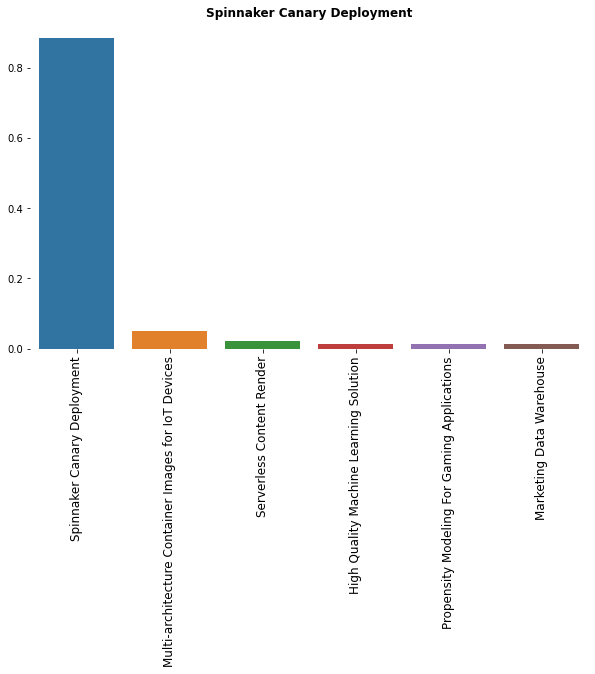

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=cl[0]['labels'], y=cl[0]['scores'], ax=ax)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=90, fontsize=12)
plt.title("Spinnaker Canary Deployment", fontweight='bold')
plt.show();

In [8]:
str_tmp_02 = "The flow of events in the architecture is as follows: \
Content variations are scheduled as tasks in Cloud Tasks. Data is read from an external source, formatted, \
and stored in intermediate storage. Client-specific render variations are queued as tasks. Content is \
rendered and the rendered content forms are stored in Cloud Storage. Cloud CDN serves content."
input_text = [str_tmp_02]

In [9]:
cl = classifier(input_text, candidate_labels)

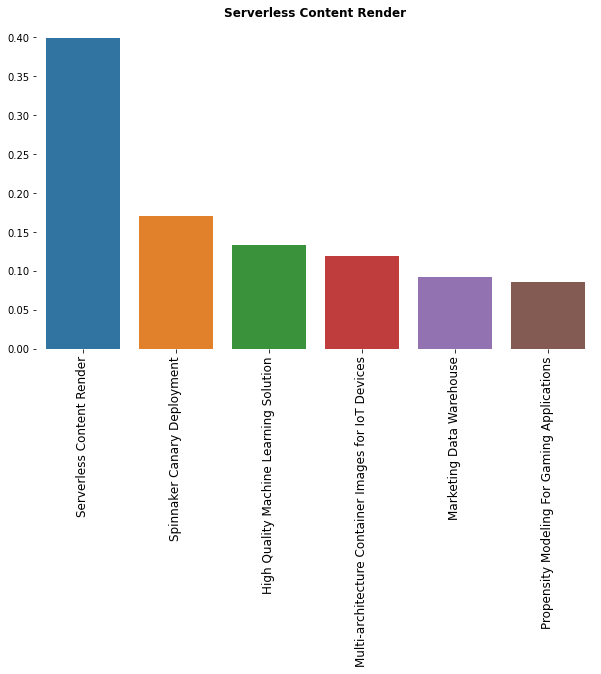

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=cl[0]['labels'], y=cl[0]['scores'], ax=ax)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=90, fontsize=12)
plt.title("Serverless Content Render", fontweight='bold')
plt.show();

In [11]:
str_tmp_03 = "The diagram shows the following stages in a marketing data warehouse workflow that you can \
configure: Data ingestion. Data processing. Machine learning. Insights and activation."
input_text = [str_tmp_03]

In [12]:
cl = classifier(input_text, candidate_labels)

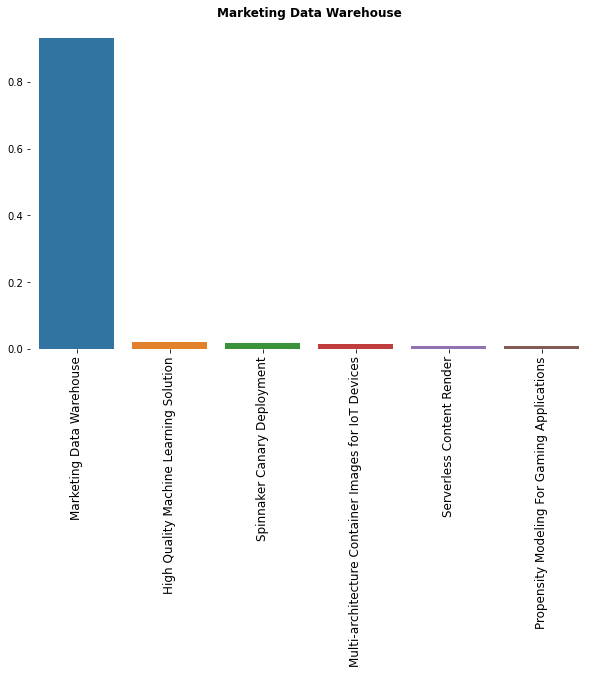

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=cl[0]['labels'], y=cl[0]['scores'], ax=ax)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=90, fontsize=12)
plt.title("Marketing Data Warehouse", fontweight='bold')
plt.show();

In [14]:
str_tmp_04 = "Have predefined and fixed thresholds for optimizing metrics and for satisficing metrics. \
Implement a streamlined evaluation routine that takes a model and data and produces a set of evaluation metrics. \
Implement the routine so it works regardless of the type of the model (for example, decision trees or neural \
networks) or the model's framework (for example, TensorFlow or Scikit-learn). \
Make sure that you have a baseline model to compare with. This baseline can consist of hardcoded heuristics or \
it can be a simple model that predicts the mean or the mode target value. Use the baseline model to check the \
performance of the ML model. If the ML model isn't better than the baseline model, there is a fundamental \
problem in the ML model.Track every experiment that has been done to help you with reproducibility and \
incremental improvement. For each experiment, store hyperparameter values, feature selection, and random seeds."
input_text = [str_tmp_04]

In [15]:
cl = classifier(input_text, candidate_labels)

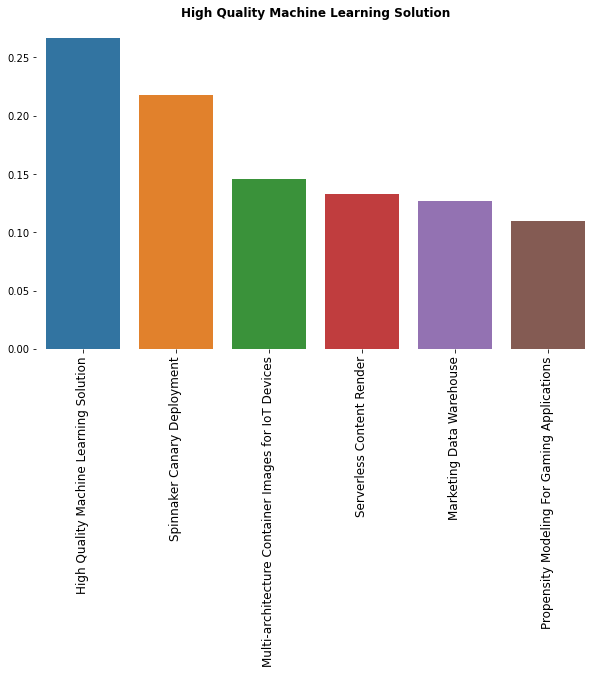

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=cl[0]['labels'], y=cl[0]['scores'], ax=ax)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=90, fontsize=12)
plt.title("High Quality Machine Learning Solution", fontweight='bold')
plt.show();

In [17]:
str_tmp_05 = "One strategy is to build each container image that you need directly in the runtime environment \
that supports the container itself, as the following diagram shows. Build path from source code repository \
to runtime environment. For each build, do the following: \
Download the source code of the container image from a source code repository on each device in the runtime \
environment. Build the container image in the runtime environment. Store the container image in the \
container image repository that is local to each device in the runtime environment."
input_text = [str_tmp_05]

In [18]:
cl = classifier(input_text, candidate_labels)

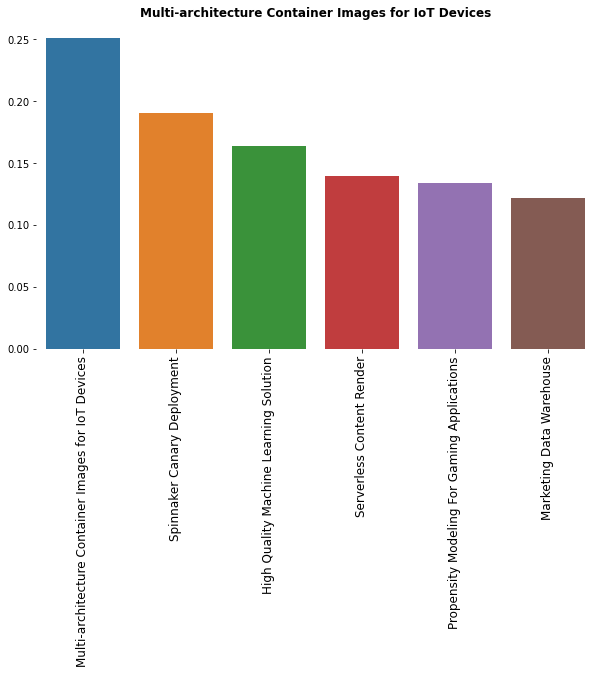

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=cl[0]['labels'], y=cl[0]['scores'], ax=ax)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=90, fontsize=12)
plt.title("Multi-architecture Container Images for IoT Devices", fontweight='bold')
plt.show();

In [20]:
str_tmp_06 = "This article discusses a high-level approach to propensity modeling, including: \
Preparing gaming data so it can be used to train a machine learning (ML) model. \
Choosing what type of propensity model to use \
Training and evaluating the model \
Getting predictions from the model \
Exporting prediction data for use in marketing campaigns"
input_text = [str_tmp_06]

In [21]:
cl = classifier(input_text, candidate_labels)

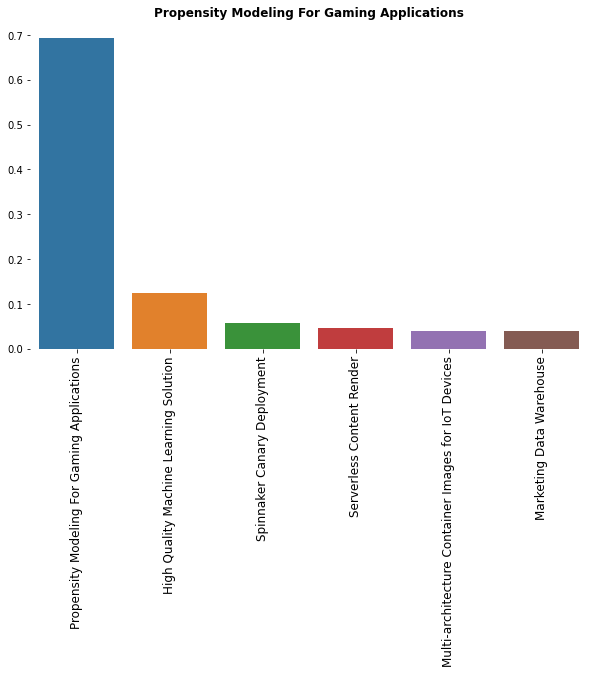

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=cl[0]['labels'], y=cl[0]['scores'], ax=ax)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=90, fontsize=12)
plt.title("Propensity Modeling For Gaming Applications", fontweight='bold')
plt.show();

Our model correctly recognizes each one oth the 6 classes. Problems may arise, that's for sure, but it seems a really good starting point for future developments. 

## Fine tuning: bert-base-uncased

In [23]:
# importing libraries
import torch
import datasets
from transformers import AutoModelForSequenceClassification, AutoTokenizer, DataCollatorWithPadding

In [24]:
# first, we build the dataset composed by the examples we just used
# and convert it in the right format --> ds

dataset_dict_train = {'label':[0,1,2,3,4,5],
                      'text':[str_tmp_01,str_tmp_02,str_tmp_03,str_tmp_04,str_tmp_05,str_tmp_06]}
ds_train = datasets.Dataset.from_dict(dataset_dict_train)
dataset_dict_test = {'label':[0,1,2,3,4,5],
                     'text':[str_tmp_01,str_tmp_02,str_tmp_03,str_tmp_04,str_tmp_05,str_tmp_06]}
ds_test = datasets.Dataset.from_dict(dataset_dict_test)
ds = datasets.DatasetDict({'train':ds_train, 'test':ds_test})

In [25]:
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=6)
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)
tokenized_datasets = ds.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [26]:
tokenized_datasets = tokenized_datasets.remove_columns(["text"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch")
tokenized_datasets["train"].column_names

['labels', 'input_ids', 'token_type_ids', 'attention_mask']

In [27]:
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

In [28]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(tokenized_datasets["train"], shuffle=True, batch_size=1, collate_fn=data_collator)
eval_dataloader = DataLoader(tokenized_datasets["test"], batch_size=1, collate_fn=data_collator)

In [29]:
for batch in train_dataloader:
    break
{k: v.shape for k, v in batch.items()}

{'labels': torch.Size([1]),
 'input_ids': torch.Size([1, 512]),
 'token_type_ids': torch.Size([1, 512]),
 'attention_mask': torch.Size([1, 512])}

In [30]:
outputs = model(**batch)
print(outputs.loss, outputs.logits.shape)

tensor(1.4703, grad_fn=<NllLossBackward>) torch.Size([1, 6])


In [31]:
from transformers import get_scheduler

num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler("linear",
                             optimizer=optimizer,
                             num_warmup_steps=0,
                             num_training_steps=num_training_steps)
print(num_training_steps)

18


In [32]:
import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
device

device(type='cpu')

In [33]:
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))
model.train()

  0%|          | 0/18 [00:00<?, ?it/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [34]:
for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

In [35]:
# evaluation on same data of our training

from datasets import load_metric

metric = load_metric("accuracy")
model.eval()
for batch in eval_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])

metric.compute()

{'accuracy': 0.5}

This model, even if trained on them, recognizes only 3 out of our 6 categories.
<br>
As already said, this is a starting point. Clearly Transformers have something to say in the Text Classification task, and it seems that we may need their full architecture, for our purposes. I've been trying different architectures, behind the curtains, and still nothing seemed able to reach results comparable to our first model.